In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

: 

In [2]:
df_1=pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\dt1516\singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [3]:
df_2=pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\dt1516\singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [4]:
df_3=pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\dt1516\singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
df_4=pd.concat([df_2, df_3],axis=0)
df_4.reset_index(drop=True, inplace=True)
df_4.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
216488,2024-05,YISHUN,5 ROOM,513D,YISHUN ST 51,04 TO 06,113.0,Improved,2018,92 years 10 months,720000.0
216489,2024-05,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,154.0,Maisonette,1988,63 years 04 months,850000.0
216490,2024-05,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Apartment,1987,62 years 05 months,815000.0
216491,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,63 years 03 months,735000.0
216492,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,62 years 09 months,948000.0


In [6]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216493 entries, 0 to 216492
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                216493 non-null  object 
 1   town                 216493 non-null  object 
 2   flat_type            216493 non-null  object 
 3   block                216493 non-null  object 
 4   street_name          216493 non-null  object 
 5   storey_range         216493 non-null  object 
 6   floor_area_sqm       216493 non-null  float64
 7   flat_model           216493 non-null  object 
 8   lease_commence_date  216493 non-null  int64  
 9   remaining_lease      216493 non-null  object 
 10  resale_price         216493 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.2+ MB


In [7]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [9]:
#Adding block and street name column and create new column name address:

df_4["address"]= df_4["block"]+" "+df_4["street_name"]

In [10]:
#drop columns:
df_5= df_4.drop(columns=["block","street_name"])

In [11]:
df_5.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10


In [12]:
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [13]:
# separate year and month columns
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month


In [14]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [15]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
df_5["town"].nunique()

26

In [17]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [18]:
df_5["flat_type"].nunique()

7

In [19]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [20]:
df_5["flat_model"].nunique()

21

In [21]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [22]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [23]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [24]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [25]:
df_5.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
216488,5,25,4.0,04 TO 06,113.0,5.0,2018,92 years 10 months,720000.0,513D YISHUN ST 51,2024
216489,5,25,5.0,04 TO 06,154.0,7.0,1988,63 years 04 months,850000.0,351 YISHUN AVE 11,2024
216490,5,25,5.0,04 TO 06,146.0,3.0,1987,62 years 05 months,815000.0,791 YISHUN AVE 2,2024
216491,5,25,5.0,04 TO 06,145.0,3.0,1988,63 years 03 months,735000.0,360 YISHUN RING RD,2024
216492,5,25,5.0,04 TO 06,154.0,7.0,1988,62 years 09 months,948000.0,834 YISHUN ST 81,2024


In [26]:
df_5[["storey_start", "storey_end"]]= df_5["storey_range"].str.split(" TO ",expand=True)

In [27]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)

In [28]:
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [29]:
df_5["address"].nunique()

9585

In [30]:
df_5["address"]= LabelEncoder().fit_transform(df_5["address"])

In [31]:
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)

In [32]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [33]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [34]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [35]:
df_5.drop(columns=["remaining_lease"],inplace= True)

In [36]:
df_6= pd.concat([df_5,df_data],axis=1)

In [37]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [38]:
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [39]:
df_8=df_7.sort_values(by=["year","month"])

In [40]:
df_8.to_csv("ResaleFlatPrices.csv", index= False)

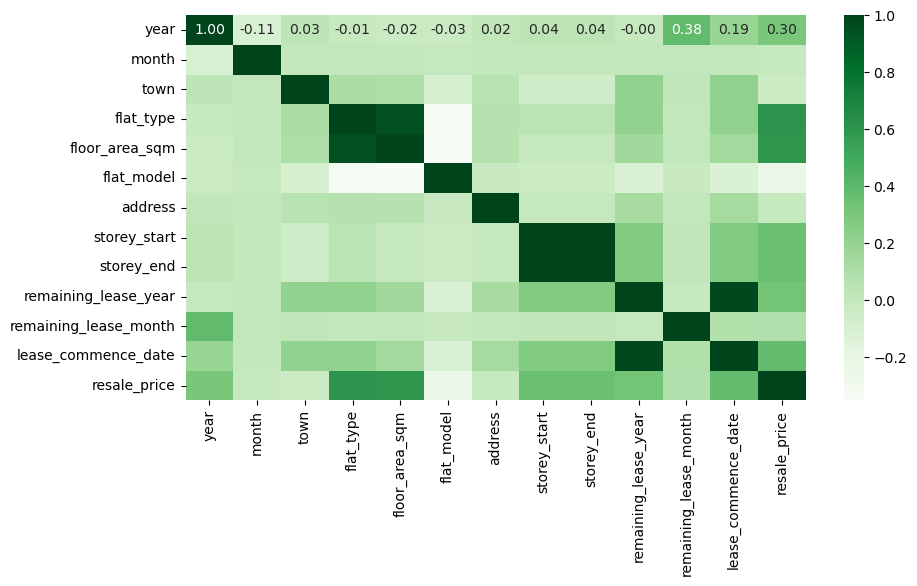

In [41]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [42]:
df_final= pd.read_csv(r"ResaleFlatPrices.csv")
df_final.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
216491,2024,5,25,5.0,145.0,3.0,4513,4,6,63,3,1988,735000.0
216492,2024,5,25,5.0,154.0,7.0,8925,4,6,62,9,1988,948000.0


In [43]:
df_final.duplicated().sum()

308

In [44]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [45]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
216183,2024,5,25,5.0,145.0,3.0,4513,4,6,63,3,1988,735000.0
216184,2024,5,25,5.0,154.0,7.0,8925,4,6,62,9,1988,948000.0


In [46]:
# The month,address column does have very lowest correlation with other features
# drop the month and address columns

In [47]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [48]:
df_final_2.head(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,7,9,70,0,1986,255000.0
1,2015,0,2.0,68.0,12.0,1,3,65,0,1981,275000.0


In [49]:
# EDA
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

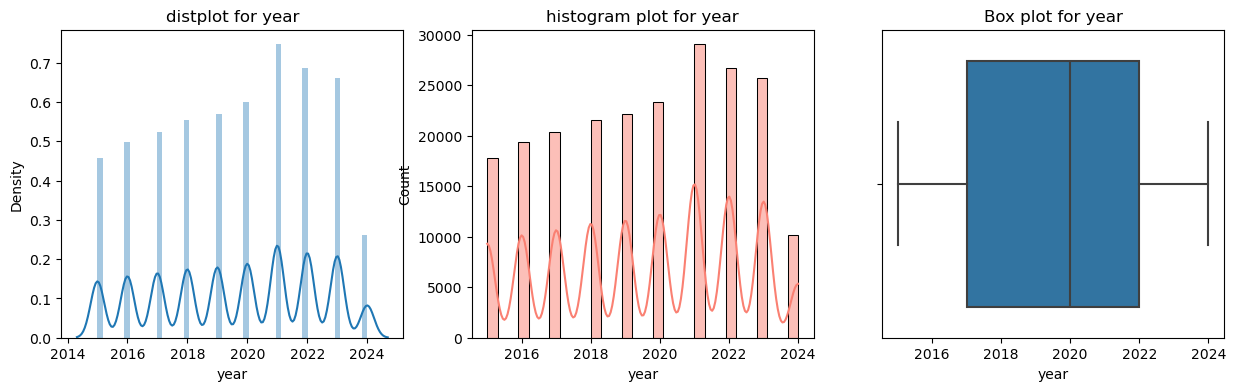

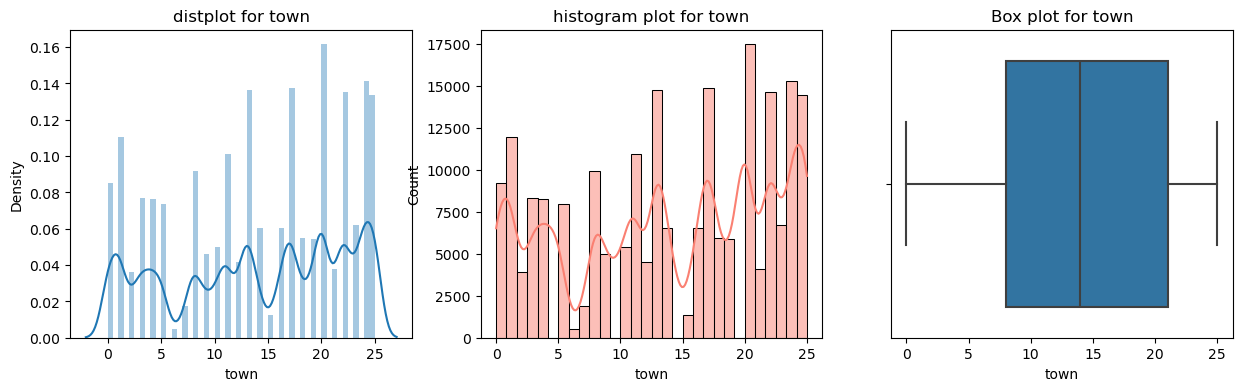

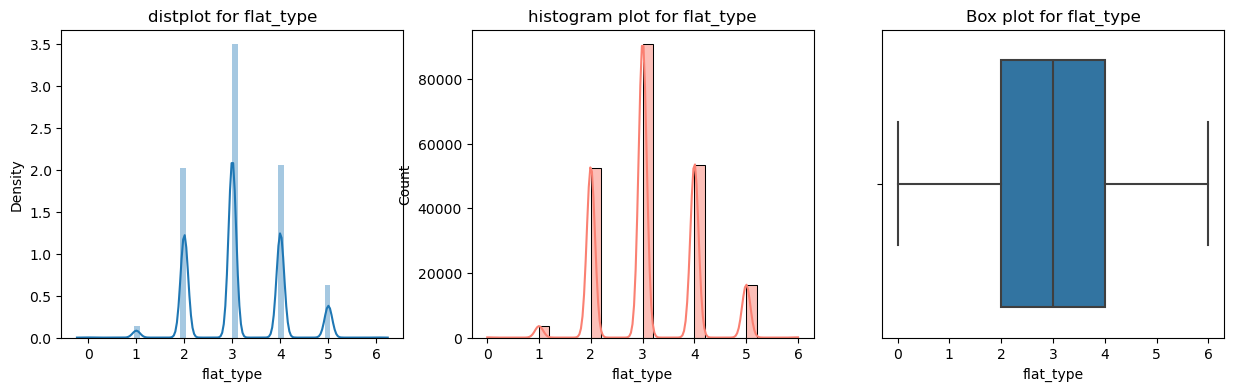

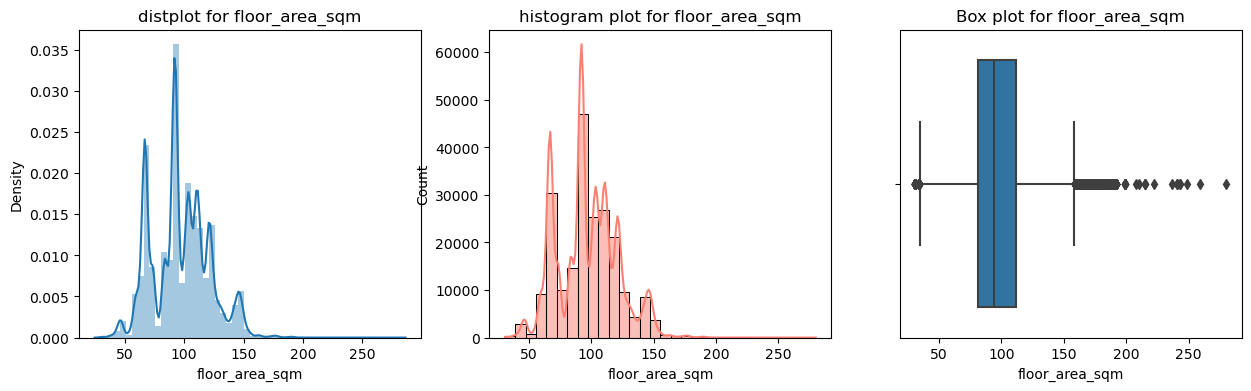

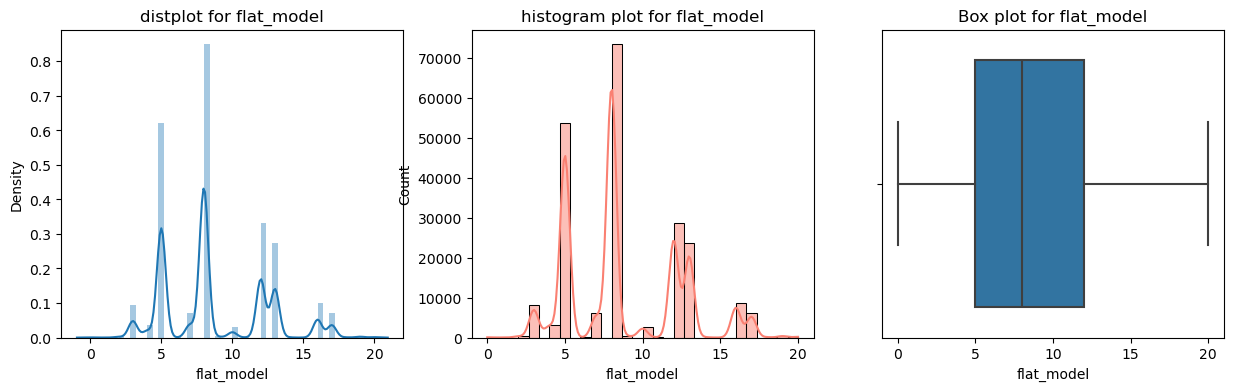

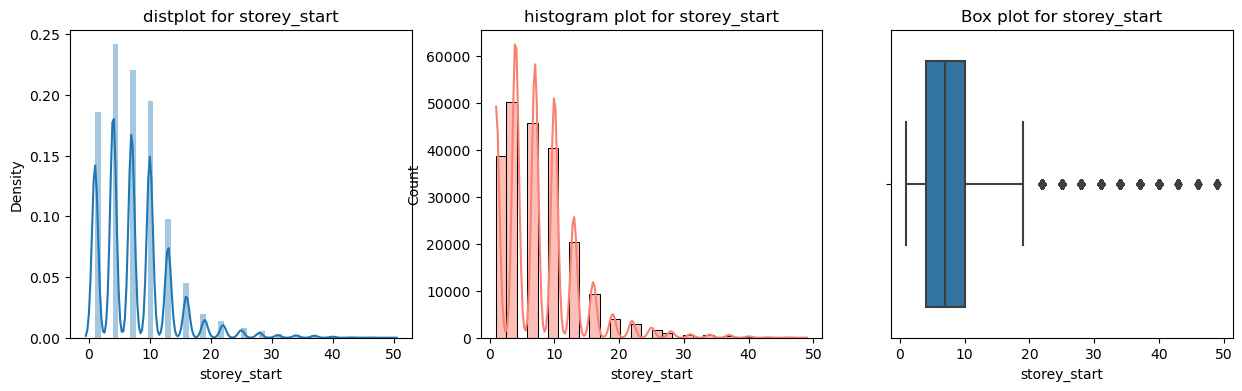

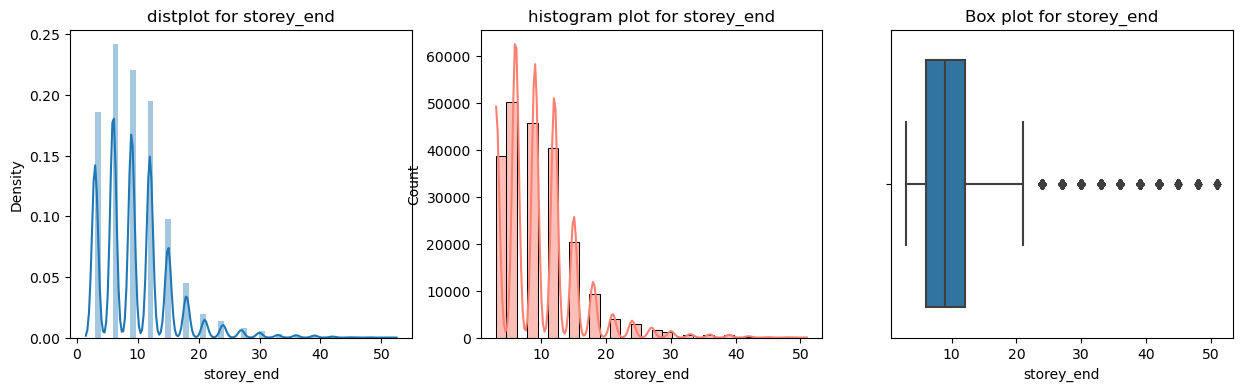

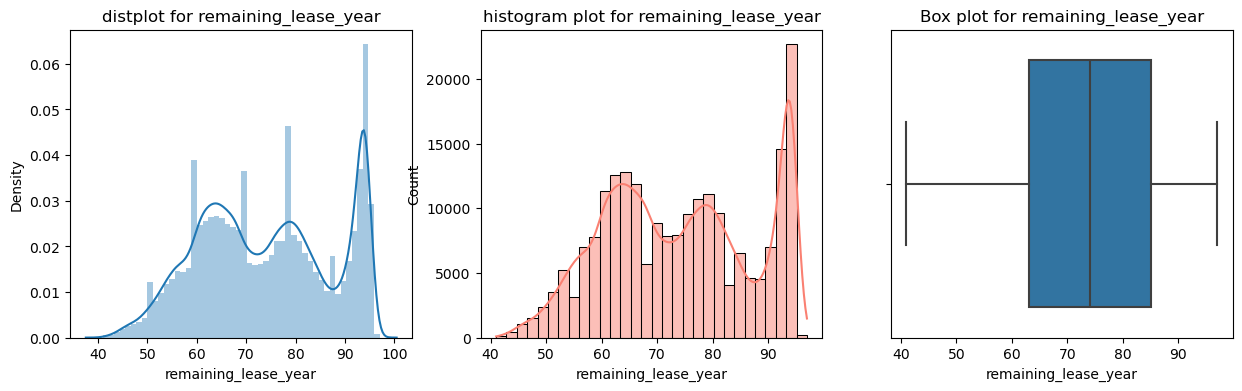

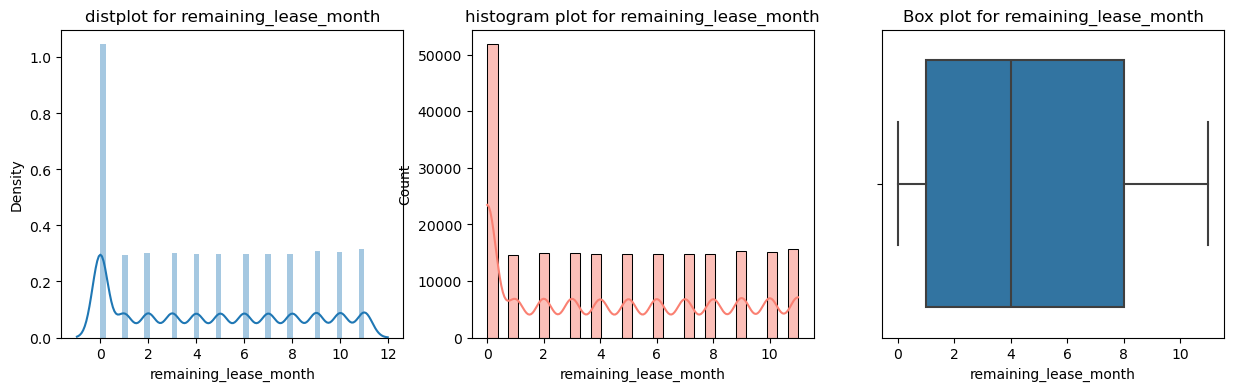

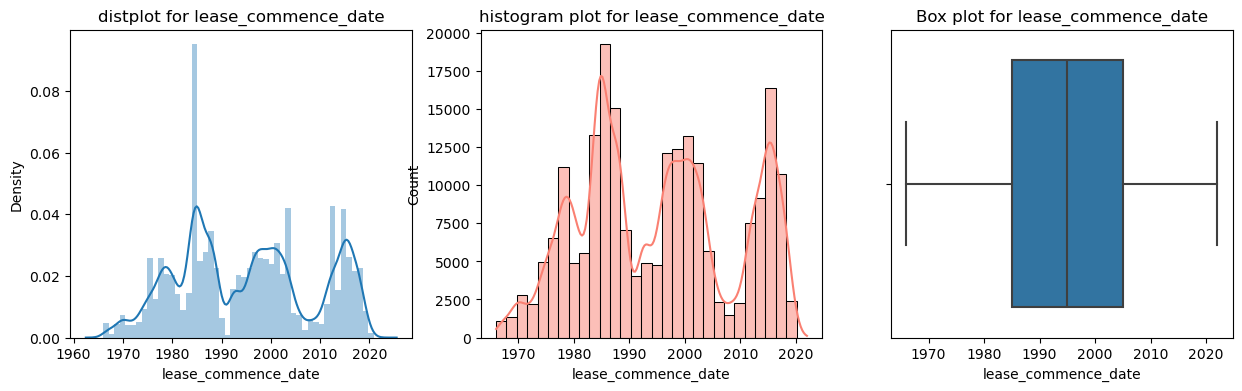

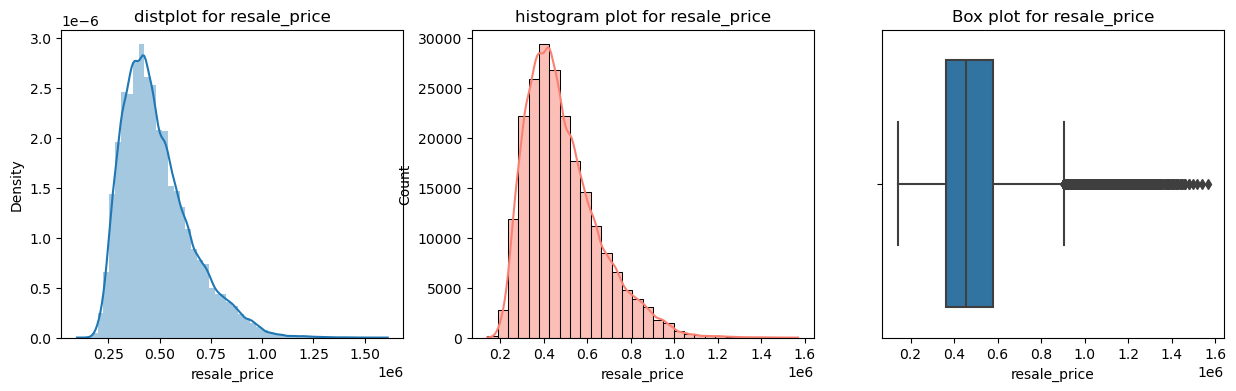

In [50]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [51]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,216185.0,2019.573782,2.666026,2015.0,2017.0,2020.0,2022.0,2024.0
town,216185.0,13.894271,7.956578,0.0,8.0,14.0,21.0,25.0
flat_type,216185.0,3.121391,0.919178,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,216185.0,97.149686,24.055298,31.0,81.0,94.0,112.0,280.0
flat_model,216185.0,8.693064,3.647842,0.0,5.0,8.0,12.0,20.0
storey_start,216185.0,7.657354,5.844641,1.0,4.0,7.0,10.0,49.0
storey_end,216185.0,9.657354,5.844641,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,216185.0,74.114282,13.461755,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,216185.0,4.593954,3.783118,0.0,1.0,4.0,8.0,11.0
lease_commence_date,216185.0,1995.123256,13.668652,1966.0,1985.0,1995.0,2005.0,2022.0


In [52]:
# skewness handling
df_final_3= df_final_2.copy()

In [53]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

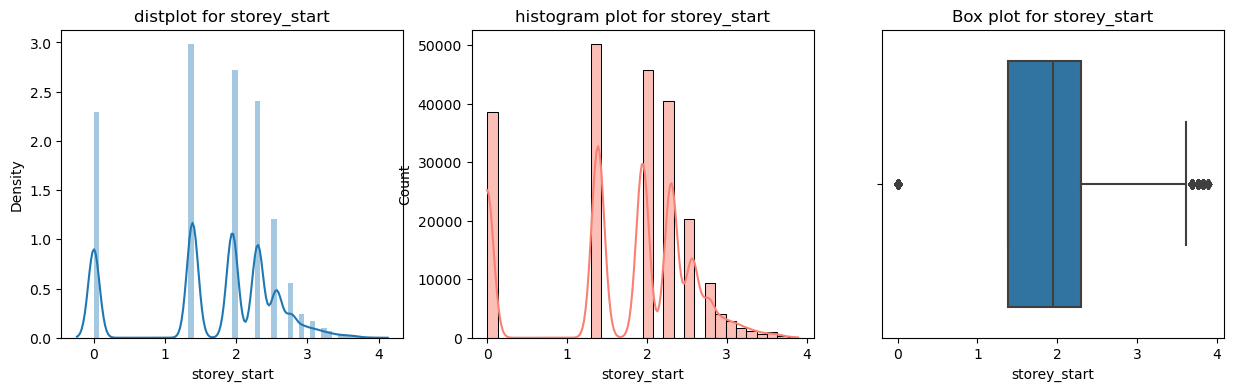

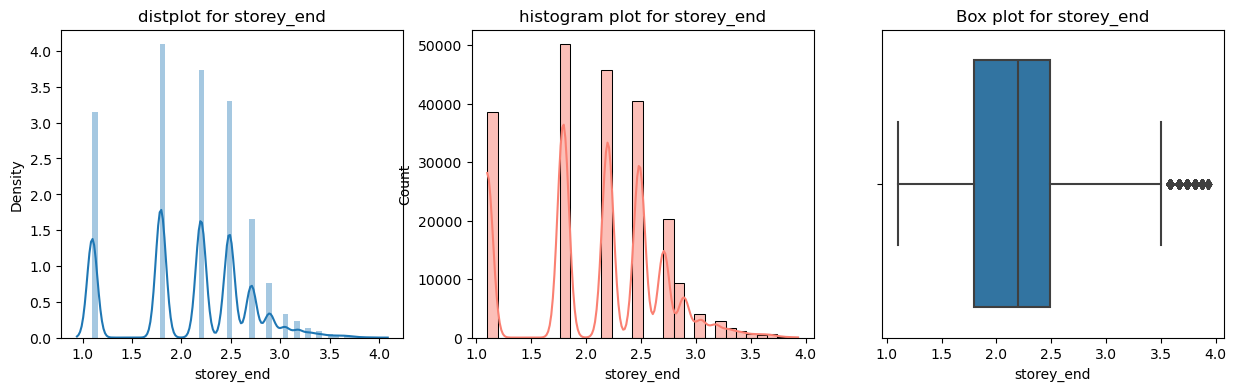

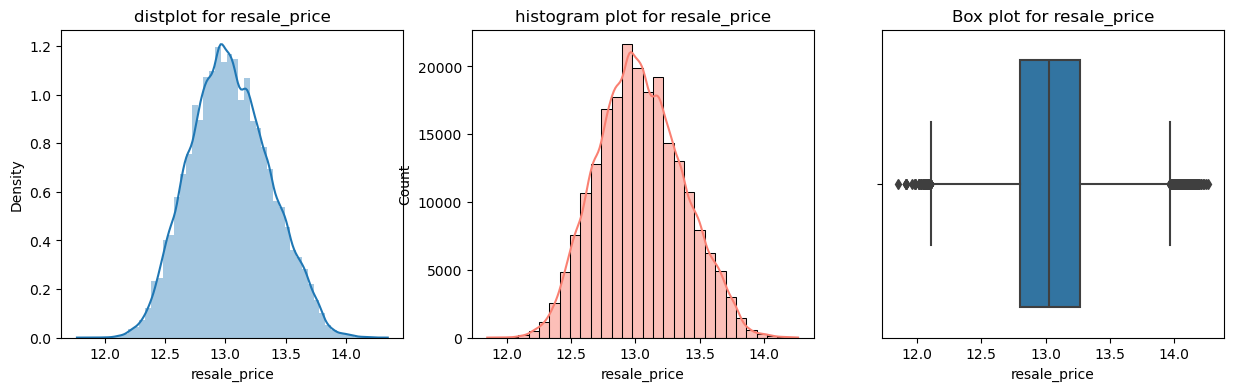

In [54]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

In [55]:
#OUTLIER TREATMENT
df_final_4= df_final_3.copy()

In [56]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [57]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

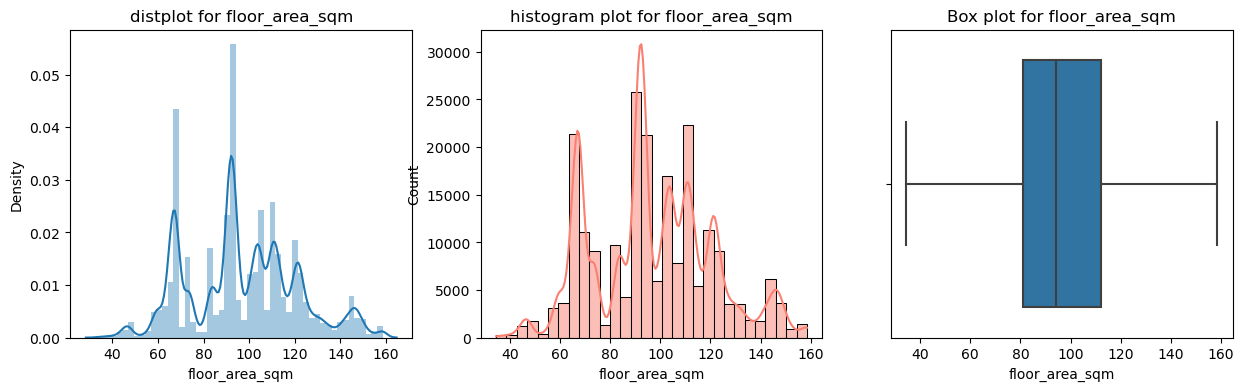

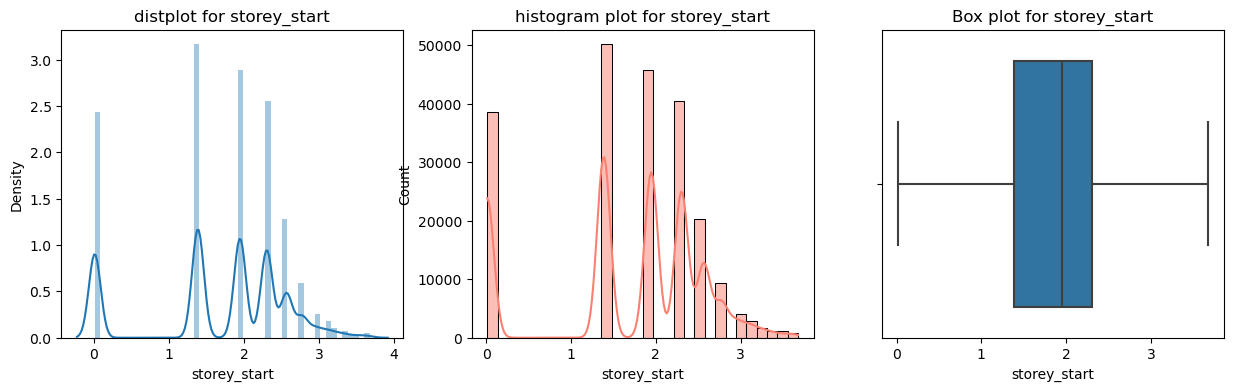

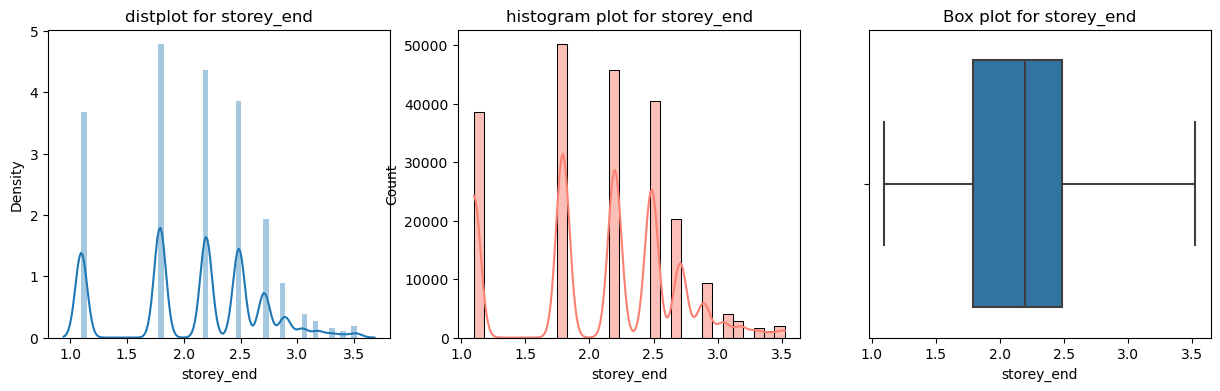

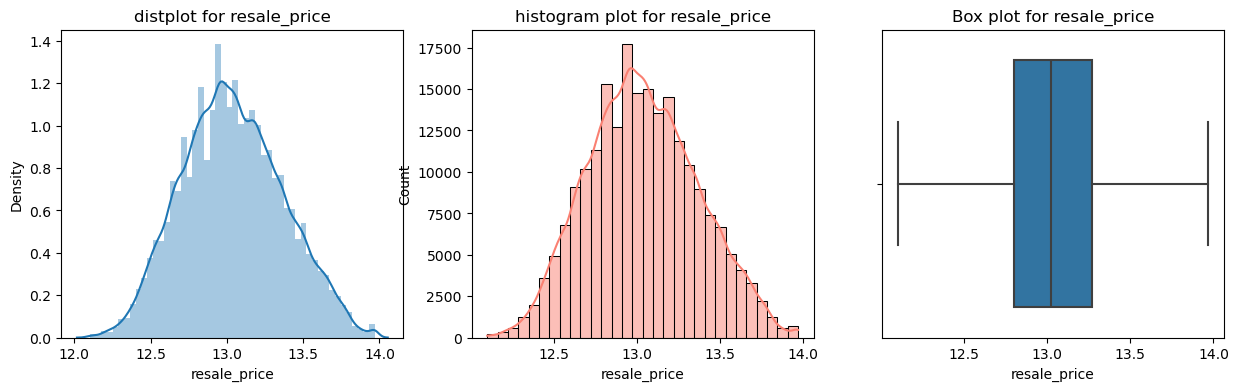

In [58]:
for k in outlier_columns:
    plot(df_final_4,k)

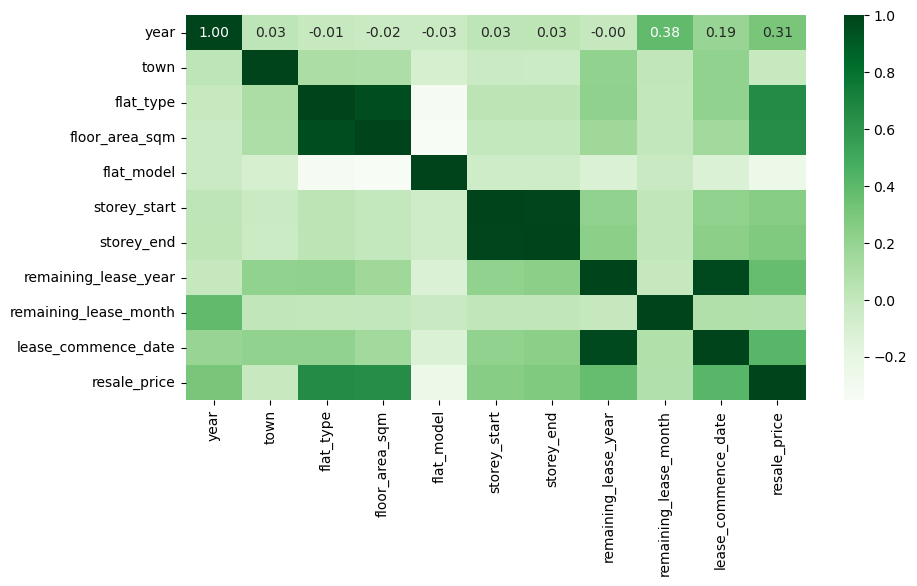

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

In [60]:
df_final_5= df_final_4.copy()

In [61]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,216185.0,2019.573782,2.666026,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,216185.0,13.894271,7.956578,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,216185.0,3.121391,0.919178,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,216185.0,97.076358,23.821148,34.500000,81.000000,94.000000,112.000000,158.500000
flat_model,216185.0,8.693064,3.647842,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,216185.0,1.695447,0.920884,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,216185.0,2.093266,0.601275,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,216185.0,74.114282,13.461755,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,216185.0,4.593954,3.783118,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,216185.0,1995.123256,13.668652,1966.000000,1985.000000,1995.000000,2005.000000,2022.000000


In [62]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
import pickle

In [63]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [64]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
#select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6734751645318366, 'Mean_squared_error': 0.035762520179199016, 'Root_mean_squared_error': 0.18910980984390793, 'Mean_absolute_error': 0.14808781719478023}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6748412572866711, 'Mean_squared_error': 0.03571670476771788, 'Root_mean_squared_error': 0.18898863661002974, 'Mean_absolute_error': 0.14790946644562966}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.996215839591469, 'Mean_squared_error': 0.0004144588658237358, 'Root_mean_squared_error': 0.02035826283904734, 'Mean_absolute_error': 0.007266583729497453}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.926729775142047, 'Mean_squared_error': 0.00804828733091462, 'Root_mean_squared_error': 0.08971224738526296, 'Mean_absolute_error': 0.06399905353017908}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9911091227337736, 'Mean_squared_error': 0.0009

In [65]:
# RandomForestClassifier is good interpretability

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9556968272946754, 'Mean_squared_error': 0.0048664333198765, 'Root_mean_squared_error': 0.0697598259736684, 'Mean_absolute_error': 0.0512974006979822}


In [66]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [67]:
np.exp(12.815838)

367999.92008841544

In [68]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.808879162922489

In [69]:
np.exp(12.792003979535888)

359332.7000997733

In [70]:
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [71]:
import pickle
import numpy as np

In [72]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [73]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.310455713622254